# ALS - Data Engineering Exercise

## Importing packages

In [1]:
import datetime
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Loading in data

In [2]:
cons_info = pd.read_csv('https://als-hiring.s3.amazonaws.com/fake_data/2020-07-01_17%3A11%3A00/cons.csv')

In [3]:
cons_email = pd.read_csv('https://als-hiring.s3.amazonaws.com/fake_data/2020-07-01_17%3A11%3A00/cons_email.csv')

In [6]:
cons_ecs = pd.read_csv('https://als-hiring.s3.amazonaws.com/fake_data/2020-07-01_17%3A11%3A00/cons_email_chapter_subscription.csv')

## Brief data exploration

In [7]:
len(cons_info), cons_info.columns

(700000,
 Index(['cons_id', 'prefix', 'firstname', 'middlename', 'lastname', 'suffix',
        'salutation', 'gender', 'birth_dt', 'title', 'employer', 'occupation',
        'income', 'source', 'subsource', 'userid', 'password', 'is_validated',
        'is_banned', 'change_password_next_login', 'consent_type_id',
        'create_dt', 'create_app', 'create_user', 'modified_dt', 'modified_app',
        'modified_user', 'status', 'note'],
       dtype='object'))

In [8]:
len(cons_email), cons_email.columns

(1400000,
 Index(['cons_email_id', 'cons_id', 'cons_email_type_id', 'is_primary', 'email',
        'canonical_local_part', 'domain', 'double_validation', 'create_dt',
        'create_app', 'create_user', 'modified_dt', 'modified_app',
        'modified_user', 'status', 'note'],
       dtype='object'))

In [9]:
len(cons_ecs), cons_ecs.columns

(350000,
 Index(['cons_email_chapter_subscription_id', 'cons_email_id', 'chapter_id',
        'isunsub', 'unsub_dt', 'modified_dt'],
       dtype='object'))

In [10]:
cons_email.cons_id.value_counts()

# some people must have multiple emails on file.
# And 605639 < 700000
# so there is not an email address for every constituent.

63766     12
187186    11
255248    11
606469    11
8581      10
          ..
98001      1
87764      1
537068     1
83670      1
370753     1
Name: cons_id, Length: 605639, dtype: int64

In [11]:
# looking at example of person with multiple emails
cons_email[cons_email.cons_id == 8581]
# in this case, only one of them is primary
# So just need where is_primary == 1

,cons_email_id,cons_id,cons_email_type_id,is_primary,email,canonical_local_part,domain,double_validation,create_dt,create_app,create_user,modified_dt,modified_app,modified_user,status,note
454499,454500,8581,7149,1,hmoore@wright.com,RlQwpTvGyQnyTKNkBElj,yahoo.com,kHByPRMypwgHurjwLubL,"Mon, 1994-11-21 05:48:51",7208,615,"Fri, 1983-04-29 00:02:39",7165,3765,1,NaN
506785,506786,8581,125,0,johnsontommy@hotmail.com,NaN,yahoo.com,NaN,"Tue, 1992-03-24 00:35:16",6783,3339,"Mon, 1971-08-23 19:40:09",1979,2797,1,NaN
525172,525173,8581,2397,0,ebonywillis@gmail.com,OoYLvQKEtAOMxDzNqNaH,gmail.com,NaN,"Fri, 1992-09-04 18:13:44",4220,2026,"Tue, 1992-09-08 21:27:49",6746,3999,1,NaN
665247,665248,8581,7027,0,adamsneil@hotmail.com,NaN,gmail.com,NaN,"Fri, 2009-03-20 17:09:17",8159,4813,"Thu, 1982-06-03 08:10:24",8322,9376,1,NaN
758854,758855,8581,3341,0,fmorales@murillo.com,wiFDPKpdDFAzRtTYAyKL,yahoo.com,NaN,"Wed, 1974-02-20 15:29:22",5278,9007,"Thu, 1989-11-16 13:51:56",7637,8649,1,NaN
768859,768860,8581,2412,0,hoffmanjeremy@peterson.biz,zMAubtiPIMjlQROPdsfB,gmail.com,vusPfXVdZcisHEPhqNVu,"Mon, 1985-03-18 13:01:17",5991,5730,"Sat, 1973-12-15 23:22:51",7925,7119,1,NaN
940655,940656,8581,5135,0,monica80@yahoo.com,IPFBmOZTfvODhNFYJbhx,yahoo.com,kDaHIUNTDQdCtCpKjIyW,"Wed, 1983-04-27 15:41:42",6303,797,"Fri, 2013-05-31 04:41:09",1272,5859,1,NaN
947733,947734,8581,4272,0,heathersalazar@nelson.com,NaN,gmail.com,NaN,"Tue, 1972-08-22 13:40:44",6840,25,"Thu, 1988-11-24 12:09:50",8330,7153,1,NaN
1046143,1046144,8581,7618,0,paul81@smith.info,jDQHDqPRSBEtzojVUQxi,gmail.com,WANcaIctxfFMznhrmSsr,"Sat, 2019-11-23 18:19:38",5360,7736,"Mon, 1998-01-05 15:20:33",714,368,1,NaN
1246782,1246783,8581,1827,0,anthonydelacruz@hotmail.com,MEaAlIplZCDtPQDcnoWw,yahoo.com,NaN,"Mon, 2012-03-12 00:11:52",3931,9660,"Sun, 2001-03-25 16:21:49",3668,6489,1,NaN


In [12]:
# does cons_ecs also have multiple rows per person?
cons_ecs.cons_email_id.value_counts()
# yes.

247486    6
670505    6
70040     6
159290    6
454000    6
         ..
208378    1
140359    1
216566    1
218613    1
524288    1
Name: cons_email_id, Length: 275484, dtype: int64

In [13]:
cons_ecs[cons_ecs.cons_email_id == 670505]

,cons_email_chapter_subscription_id,cons_email_id,chapter_id,isunsub,unsub_dt,modified_dt
2189,2190,670505,1,1,"Sat, 2005-09-10 00:24:37","Tue, 1984-11-27 07:39:17"
46094,46095,670505,2,1,"Tue, 2016-12-06 04:31:58","Sun, 2012-03-18 13:44:46"
174959,174960,670505,2,1,"Sat, 2017-08-26 22:49:04","Thu, 1997-12-18 02:20:50"
219590,219591,670505,3,0,"Tue, 2017-04-25 12:05:56","Wed, 2007-10-03 11:36:32"
299765,299766,670505,2,1,"Fri, 2017-01-06 14:39:06","Sat, 1972-01-01 02:32:22"
309709,309710,670505,4,1,"Thu, 1971-10-14 13:49:41","Fri, 2018-10-19 12:42:15"


In [14]:
cons_ecs[cons_ecs.chapter_id == 1].cons_email_id.value_counts()

# It seems that for chapter_id ==1, all value counts are 1, no repeats
# so each row represents only one instance of a person

526335    1
64074     1
625252    1
107105    1
21087     1
         ..
253649    1
210636    1
198346    1
204489    1
524288    1
Name: cons_email_id, Length: 275484, dtype: int64

In [15]:
# trying out initial merge between cons_info and cons_email
merge_draft = cons_email[cons_email.is_primary == 1][['cons_id', 'cons_email_id', 'email', 'modified_dt']].merge(
    cons_info[['cons_id', 'create_dt', 'modified_dt']],
    on = 'cons_id',
    how = 'right'
)

In [16]:
merge_draft[merge_draft.modified_dt_x != merge_draft.modified_dt_y]
# modified_dt from these two files do not match on each other
# sticking with modified_dt from cons_info because I believe that is what is intended
# documented choice in README

,cons_id,cons_email_id,email,modified_dt_x,create_dt,modified_dt_y
0,1,546912.0,daniel72@hudson.com,"Sat, 2008-05-31 02:30:35","Fri, 1983-08-26 06:02:03","Sun, 2015-12-27 09:28:02"
1,2,415587.0,caustin@spears-carson.com,"Fri, 1982-12-17 18:55:42","Mon, 1979-03-05 21:08:54","Tue, 1989-06-20 13:28:57"
2,3,81594.0,klewis@ford.biz,"Tue, 1992-03-24 07:15:14","Fri, 2008-08-22 19:20:28","Fri, 2020-06-05 18:13:57"
3,4,NaN,NaN,NaN,"Sun, 1984-04-29 11:18:18","Tue, 2012-01-31 07:26:35"
4,5,182741.0,stephenhamilton@gmail.com,"Sun, 1990-04-01 16:41:29","Thu, 2007-07-19 18:28:09","Tue, 1971-04-27 06:53:53"
...,...,...,...,...,...,...
699995,699996,475997.0,cobbpatricia@anderson.biz,"Sat, 1995-04-29 23:41:43","Mon, 2008-06-16 18:49:16","Sat, 1999-10-23 22:19:10"
699996,699997,640359.0,hjones@raymond-adkins.com,"Fri, 2009-05-01 07:31:20","Thu, 2001-11-15 08:04:01","Tue, 2010-08-24 07:06:01"
699997,699998,434896.0,jennifer82@oneal.com,"Thu, 1984-11-15 07:53:42","Thu, 1973-06-14 08:14:54","Fri, 1995-09-29 17:28:40"
699998,699999,786344.0,robertodixon@wilson.net,"Thu, 1974-10-24 00:31:44","Tue, 1998-06-02 01:24:00","Sun, 2014-06-01 11:16:45"


### Notes
It appears that:
- cons_info can be joined with cons_email by cons_id
- cons_ecs can be joined with cons_ecs by cons_email_id
- a given constituent can have multiple emails on file, but only one primary email
- not every constituent in cons_info has a corresponding email address in cons_email
- each row in cons_ecs[cons_ecs.chapter_id == 1] represents one instance of one constituent

## Creating "people" file

### Step 1: Join data

In [17]:
# first merge: cons_info and cons_email (primary emails only)

merge_1 = cons_email[cons_email.is_primary == 1][['cons_id', 'email', 'cons_email_id']].merge(
    cons_info[['cons_id', 'create_dt', 'modified_dt', 'source']], on = 'cons_id', how = 'right'
)
# left merge preserves all relevant constituent-level data available
# also leaves missing information as NaN

In [18]:
merge_1.head()

,cons_id,email,cons_email_id,create_dt,modified_dt,source
0,1,daniel72@hudson.com,546912.0,"Fri, 1983-08-26 06:02:03","Sun, 2015-12-27 09:28:02",google
1,2,caustin@spears-carson.com,415587.0,"Mon, 1979-03-05 21:08:54","Tue, 1989-06-20 13:28:57",facebook
2,3,klewis@ford.biz,81594.0,"Fri, 2008-08-22 19:20:28","Fri, 2020-06-05 18:13:57",NaN
3,4,NaN,NaN,"Sun, 1984-04-29 11:18:18","Tue, 2012-01-31 07:26:35",google
4,5,stephenhamilton@gmail.com,182741.0,"Thu, 2007-07-19 18:28:09","Tue, 1971-04-27 06:53:53",NaN


In [19]:
# second merge: merge_1 and cons_ecs
# "We only care about subscription statuses where chapter_id is 1."
# so only using cons_ecs[cons_ecs.chapter_id == 1]

merge_2 = merge_1.merge(
    cons_ecs[cons_ecs.chapter_id == 1][['cons_email_id', 'isunsub']], on = 'cons_email_id', how = 'left'
)
# again, left merge preserves all relevant constituent-level data available
# and leaves missing information as NaN

### Step 2: Create "people" dataframe

In [20]:
# removing original merge fields
people = merge_2.drop(columns = ['cons_email_id', 'cons_id']) 

### Step 3: substitute isunsub NaN's with 1

In [21]:
# "If an email is not present in this table, it is assumed to still be subscribed where chapter_id is 1."
people[people.isunsub.isna()]
# 526010 NaNs need to be replaced with "1"

,email,create_dt,modified_dt,source,isunsub
0,daniel72@hudson.com,"Fri, 1983-08-26 06:02:03","Sun, 2015-12-27 09:28:02",google,NaN
3,NaN,"Sun, 1984-04-29 11:18:18","Tue, 2012-01-31 07:26:35",google,NaN
5,henryherring@gmail.com,"Sat, 2014-02-15 22:54:27","Fri, 1999-11-12 06:09:25",google,NaN
6,perrymatthew@campbell.com,"Thu, 1979-03-01 16:12:55","Wed, 2019-03-13 02:52:10",NaN,NaN
7,tonifranklin@yahoo.com,"Tue, 2002-07-30 22:28:38","Sat, 1983-07-16 18:30:07",twitter,NaN
...,...,...,...,...,...
699994,smithoscar@navarro.com,"Tue, 2003-10-21 04:59:43","Thu, 2010-11-18 23:11:46",facebook,NaN
699995,cobbpatricia@anderson.biz,"Mon, 2008-06-16 18:49:16","Sat, 1999-10-23 22:19:10",NaN,NaN
699997,jennifer82@oneal.com,"Thu, 1973-06-14 08:14:54","Fri, 1995-09-29 17:28:40",twitter,NaN
699998,robertodixon@wilson.net,"Tue, 1998-06-02 01:24:00","Sun, 2014-06-01 11:16:45",google,NaN


In [22]:
# referenced https://stackoverflow.com/questions/944700/how-can-i-check-for-nan-values for np.isnan() function

people.isunsub = people.isunsub.apply(lambda x: 1 if np.isnan(x) else x)

In [23]:
people.head()

,email,create_dt,modified_dt,source,isunsub
0,daniel72@hudson.com,"Fri, 1983-08-26 06:02:03","Sun, 2015-12-27 09:28:02",google,1.0
1,caustin@spears-carson.com,"Mon, 1979-03-05 21:08:54","Tue, 1989-06-20 13:28:57",facebook,1.0
2,klewis@ford.biz,"Fri, 2008-08-22 19:20:28","Fri, 2020-06-05 18:13:57",NaN,1.0
3,NaN,"Sun, 1984-04-29 11:18:18","Tue, 2012-01-31 07:26:35",google,1.0
4,stephenhamilton@gmail.com,"Thu, 2007-07-19 18:28:09","Tue, 1971-04-27 06:53:53",NaN,1.0


### Step 4: transform to correct data types

In [24]:
# looks like not all columns are in the correct format
people.dtypes

email           object
create_dt       object
modified_dt     object
source          object
isunsub        float64
dtype: object

In [25]:
# boolean should be int, less confusing this way
people.isunsub = people.isunsub.astype(int) 

In [26]:
# change *_dt fields to actual pandas datetime format

people.create_dt = people.create_dt.apply(lambda x: pd.to_datetime(x.split(',')[1]))
people.modified_dt = people.modified_dt.apply(lambda x: pd.to_datetime(x.split(',')[1]))

In [27]:
# dtypes are now correct

people.dtypes

email                  object
create_dt      datetime64[ns]
modified_dt    datetime64[ns]
source                 object
isunsub                 int64
dtype: object

### Step 5: format dataframe correctly

In [28]:
# putting columns in correct order

people = people[['email', 'source', 'isunsub', 'create_dt', 'modified_dt']]

In [29]:
# renaming columns to correct names
people = people.rename(columns = {
    'source': 'code', 'isunsub': 'is_unsub', 'modified_dt': 'updated_dt'
})

In [30]:
people.tail() # looks good!

,email,code,is_unsub,create_dt,updated_dt
699995,cobbpatricia@anderson.biz,NaN,1,2008-06-16 18:49:16,1999-10-23 22:19:10
699996,hjones@raymond-adkins.com,NaN,1,2001-11-15 08:04:01,2010-08-24 07:06:01
699997,jennifer82@oneal.com,twitter,1,1973-06-14 08:14:54,1995-09-29 17:28:40
699998,robertodixon@wilson.net,google,1,1998-06-02 01:24:00,2014-06-01 11:16:45
699999,christie54@gmail.com,NaN,1,1989-02-15 17:34:48,2020-04-30 19:39:18


### Step 6: Export to CSV

In [31]:
people.to_csv('people.csv', index = False)

## Creating "acquistion_facts" file

### Step 1: Extract revelent information from "people" dataframe

In [32]:
# only need email and create_dt
acq_facts = people[['email', 'create_dt']]

### Step 2: Create acquisition_date and transform to date

In [33]:
# just need date (not datetime) for acquisition>date
acq_facts['acquisition_date'] = acq_facts.create_dt.dt.date

<ipython-input-33-2e24dfc1d56d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  acq_facts['acquisition_date'] = acq_facts.create_dt.dt.date


In [34]:
# this column is no longer needed
acq_facts = acq_facts.drop(columns = 'create_dt')

### Step 3: Transform acq_facts into date and count of acquisitions on date

In [35]:
# take value_counts() output and make into new dataframe with correct column names
acq_facts = pd.DataFrame(acq_facts.acquisition_date.value_counts().reset_index().rename(
    columns = {'acquisition_date': 'acquisitions', 'index': 'acquisition_date'}
))

In [36]:
# sort the data by date for more intuitive organization
acq_facts.sort_values('acquisition_date', inplace = True)

In [37]:
acq_facts.head() # looks good!

,acquisition_date,acquisitions
13264,1970-01-01,34
8582,1970-01-02,38
15423,1970-01-03,32
7253,1970-01-04,39
3251,1970-01-05,44


### Step 4: Write acq_facts to CSV

In [38]:
acq_facts.to_csv('acquisition_facts.csv', index = False)

## Example of exploratory analysis

In [2]:
people = pd.read_csv('people.csv')

In [3]:
people

,email,code,is_unsub,create_dt,updated_dt
0,daniel72@hudson.com,google,1,1983-08-26 06:02:03,2015-12-27 09:28:02
1,caustin@spears-carson.com,facebook,1,1979-03-05 21:08:54,1989-06-20 13:28:57
2,klewis@ford.biz,NaN,1,2008-08-22 19:20:28,2020-06-05 18:13:57
3,NaN,google,1,1984-04-29 11:18:18,2012-01-31 07:26:35
4,stephenhamilton@gmail.com,NaN,1,2007-07-19 18:28:09,1971-04-27 06:53:53
...,...,...,...,...,...
699995,cobbpatricia@anderson.biz,NaN,1,2008-06-16 18:49:16,1999-10-23 22:19:10
699996,hjones@raymond-adkins.com,NaN,1,2001-11-15 08:04:01,2010-08-24 07:06:01
699997,jennifer82@oneal.com,twitter,1,1973-06-14 08:14:54,1995-09-29 17:28:40
699998,robertodixon@wilson.net,google,1,1998-06-02 01:24:00,2014-06-01 11:16:45


In [17]:
people_vis_df = pd.DataFrame(people.code.value_counts(dropna = False)
    ).reset_index(
    ).rename(columns = {'index': 'Source', 'code': 'Number of acquisitions'}
    ).fillna('unknown')

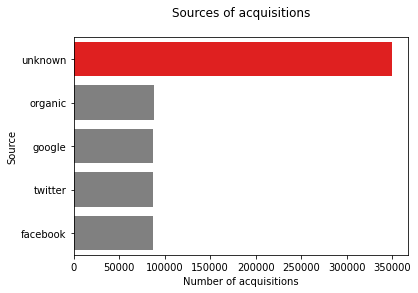

In [24]:
colors = ['red' if x == 'unknown' else 'grey' for x in people_vis_df['Source']]

plt.figure()
sns.barplot(y = people_vis_df['Source'],
            x = people_vis_df['Number of acquisitions'],
           palette = colors)
plt.title('Sources of acquisitions\n')
plt.show()

In [4]:
acquisition_facts = pd.read_csv('acquisition_facts.csv')

In [ ]:
acquisition_facts

In [11]:
acquisition_facts.acquisition_date = acquisition_facts.acquisition_date.apply(
    lambda x: pd.to_datetime(x)
)

In [12]:
acquisition_facts

,acquisition_date,acquisitions
0,1970-01-01,34
1,1970-01-02,38
2,1970-01-03,32
3,1970-01-04,39
4,1970-01-05,44
...,...,...
18440,2020-06-27,39
18441,2020-06-28,38
18442,2020-06-29,30
18443,2020-06-30,47


In [31]:
only201819 = acquisition_facts[(acquisition_facts['acquisition_date'].dt.year == 2019) |
                            (acquisition_facts['acquisition_date'].dt.year == 2018)]

In [69]:
only201819['Year'] = only201819['acquisition_date'].dt.year

<ipython-input-69-1519ad50ac80>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  only201819['Year'] = only201819['acquisition_date'].dt.year


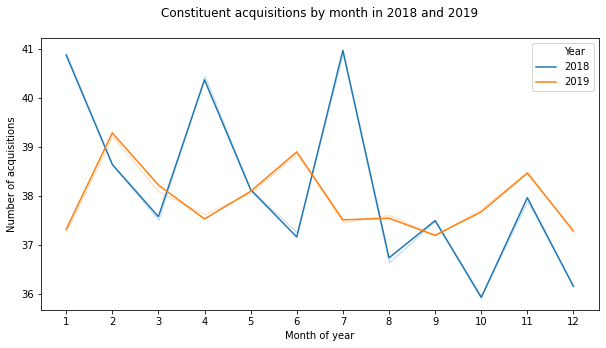

In [73]:
plt.figure(figsize = (10, 5))

acq_vis = sns.lineplot(
    x = only201819['acquisition_date'].dt.month,
    y = only201819['acquisitions'],
    hue = only201819['Year'],
    legend = 'full',
    ci = False,
    palette = 'tab10'
)

plt.xlabel('Month of year')
plt.ylabel('Number of acquisitions')
plt.title('Constituent acquisitions by month in 2018 and 2019\n')
plt.xticks(range(1,13))
plt.show()